[toc]

# 特征选择

1. TF-IDF原理。
2. 文本矩阵化，使用词袋模型，以TF-IDF特征值为权重。（可以使用Python中TfidfTransformer库）
3. 互信息的原理。
4. 使用第二步生成的特征矩阵，利用互信息进行特征筛选。

## 文本挖掘预处理tf-idf

In [1]:
corpus=["I come to China to travel", 
    "This is a car polupar in China",          
    "I love tea and Apple ",   
    "The work is to write some papers in science"] 


In [6]:
# list(corpus[0])+list(corpus[1])

TF-IDF是Term Frequency -  Inverse Document Frequency的缩写，即“词频-逆文本频率”。它由两部分组成，TF和IDF。

TF是词频，即文本中各个词的出现频率统计，并作为文本特征。

IDF，即“逆文本频率”如何理解。有些词几乎所有文本都会出现的"to"其词频虽然高，但是重要性却应该比词频低的"China"和“Travel”要低。我们的IDF就是来帮助我们来反应这个词的重要性的，进而修正仅仅用词频表示的词特征值。

概括来讲， IDF反应了一个词在所有文本中出现的频率，如果一个词在很多的文本中出现，那么它的IDF值应该低，比如上文中的“to”。而反过来如果一个词在比较少的文本中出现，那么它的IDF值应该高。比如一些专业的名词如“Machine Learning”。这样的词IDF值应该高。一个极端的情况，如果一个词在所有的文本中都出现，那么它的IDF值应该为0。

上面是从定性上说明的IDF的作用，那么如何对一个词的IDF进行定量分析呢？这里直接给出一个词x的IDF的基本公式如下：

$$\operatorname{IDF}(x)=\log \frac{N}{N(x)}$$

　　　　其中，N代表语料库中文本的总数，而N(x)代表语料库中包含词x的文本总数。

上面的IDF公式已经可以使用了，但是在一些特殊的情况会有一些小问题，比如某一个生僻词在语料库中没有，这样我们的分母为0， IDF没有意义了。所以常用的IDF我们需要做一些平滑，使语料库中没有出现的词也可以得到一个合适的IDF值。平滑的方法有很多种，最常见的IDF平滑后的公式之一为：

$$\operatorname{IDF}(x)=\log \frac{N+1}{N(x)+1}+1$$

    有了IDF的定义，我们就可以计算某一个词的TF-IDF值了：

$$\operatorname{IDF}(x)=\log \frac{N+1}{N(x)+1}+1$$

其中TF(x)指词x在当前文本中的词频。

## 文本矩阵化

### scikit-learn进行tf-idf处理

在scikit-learn中，有两种方法进行TF-IDF的预处理。

　　　　第一种方法是在用CountVectorizer类向量化之后再调用TfidfTransformer类进行预处理。第二种方法是直接用TfidfVectorizer完成向量化与TF-IDF预处理。

　　　　首先我们来看第一种方法，CountVectorizer+TfidfTransformer的组合，代码如下：

In [1]:
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer

corpus=["I come to China to travel", 
    "This is a car polupar in China",          
    "I love tea and Apple ",   
    "The work is to write some papers in science"] 

vectorizer = CountVectorizer()

transformer = TfidfTransformer()

tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))

In [3]:
print(tfidf)

  (0, 16)	0.4424621378947393
  (0, 15)	0.697684463383976
  (0, 4)	0.4424621378947393
  (0, 3)	0.348842231691988
  (1, 14)	0.45338639737285463
  (1, 9)	0.45338639737285463
  (1, 6)	0.3574550433419527
  (1, 5)	0.3574550433419527
  (1, 3)	0.3574550433419527
  (1, 2)	0.45338639737285463
  (2, 12)	0.5
  (2, 7)	0.5
  (2, 1)	0.5
  (2, 0)	0.5
  (3, 18)	0.3565798233381452
  (3, 17)	0.3565798233381452
  (3, 15)	0.2811316284405006
  (3, 13)	0.3565798233381452
  (3, 11)	0.3565798233381452
  (3, 10)	0.3565798233381452
  (3, 8)	0.3565798233381452
  (3, 6)	0.2811316284405006
  (3, 5)	0.2811316284405006


用TfidfVectorizer一步到位

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer()
re = tfidf2.fit_transform(corpus)
print(re)

  (0, 16)	0.4424621378947393
  (0, 3)	0.348842231691988
  (0, 15)	0.697684463383976
  (0, 4)	0.4424621378947393
  (1, 5)	0.3574550433419527
  (1, 9)	0.45338639737285463
  (1, 2)	0.45338639737285463
  (1, 6)	0.3574550433419527
  (1, 14)	0.45338639737285463
  (1, 3)	0.3574550433419527
  (2, 1)	0.5
  (2, 0)	0.5
  (2, 12)	0.5
  (2, 7)	0.5
  (3, 10)	0.3565798233381452
  (3, 8)	0.3565798233381452
  (3, 11)	0.3565798233381452
  (3, 18)	0.3565798233381452
  (3, 17)	0.3565798233381452
  (3, 13)	0.3565798233381452
  (3, 5)	0.2811316284405006
  (3, 6)	0.2811316284405006
  (3, 15)	0.2811316284405006


TF-IDF是非常常用的文本挖掘预处理基本步骤，但是如果预处理中使用了Hash Trick，则一般就无法使用TF-IDF了，因为Hash Trick后我们已经无法得到哈希后的各特征的IDF的值。使用了IF-IDF并标准化以后，我们就可以使用各个文本的词特征向量作为文本的特征，进行分类或者聚类分析。

　　　　当然TF-IDF不光可以用于文本挖掘，在信息检索等很多领域都有使用。因此值得好好的理解这个方法的思想。

### 不同方式计算TF-IDF

- 用gensim库来计算tfidf值
- 用sklearn库来计算tfidf值
- 用python手动实现tfidf的计算

参考 https://www.jianshu.com/p/f3b92124cd2b

In [12]:
corpus=["I come to China to travel", 
    "This is a car polupar in China",          
    "I love tea and Apple ",   
    "The work is to write some papers in science"] 



In [13]:
print(word_list)

[['I', 'come', 'to', 'China', 'to', 'travel'], ['I', 'come', 'to', 'China', 'to', 'travel'], ['I', 'come', 'to', 'China', 'to', 'travel'], ['I', 'come', 'to', 'China', 'to', 'travel']]


### 用gensim库来计算tfidf值

Gensim是一款开源的第三方Python工具包，用于从原始的非结构化的文本中，无监督地学习到文本隐层的主题向量表达。 
它支持包括TF-IDF，LSA，LDA，和word2vec在内的多种主题模型算法， 
支持流式训练，并提供了诸如相似度计算，信息检索等一些常用任务的API接口



In [39]:
# 分词处理
word_list = [corpus[0].split(' ') for i in range(len(corpus))]

In [40]:
# 计算每个值得id值和词频

from gensim import corpora
# 赋给语料库中每个词(不重复的词)一个整数id
dictionary = corpora.Dictionary(word_list)
new_corpus = [dictionary.doc2bow(text) for text in word_list]
print(new_corpus)

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1)], [(0, 1), (1, 1), (2, 1), (3, 2), (4, 1)], [(0, 1), (1, 1), (2, 1), (3, 2), (4, 1)], [(0, 1), (1, 1), (2, 1), (3, 2), (4, 1)]]


In [28]:
# 通过下面的方法可以看到语料库中每个词对应的id
 print(dictionary.token2id)

{'China': 0, 'I': 1, 'come': 2, 'to': 3, 'travel': 4, 'This': 5, 'a': 6, 'car': 7, 'in': 8, 'is': 9, 'polupar': 10, '': 11, 'Apple': 12, 'and': 13, 'love': 14, 'tea': 15, 'The': 16, 'papers': 17, 'science': 18, 'some': 19, 'work': 20, 'write': 21}


In [29]:
# 训练gensim模型并且保存它以便后面的使用

# 训练模型并保存
from gensim import models
tfidf = models.TfidfModel(new_corpus)
tfidf.save("my_model.tfidf")

# 载入模型
tfidf = models.TfidfModel.load("my_model.tfidf")

# 使用这个训练好的模型得到单词的tfidf值
tfidf_vec = []
for i in range(len(corpus)):
    string = corpus[i]
    string_bow = dictionary.doc2bow(string.lower().split())
    string_tfidf = tfidf[string_bow]
    tfidf_vec.append(string_tfidf)
print(tfidf_vec)

[[(2, 0.5773502691896258), (3, 0.5773502691896258), (4, 0.5773502691896258)], [(6, 0.5345224838248488), (7, 0.5345224838248488), (8, 0.2672612419124244), (9, 0.2672612419124244), (10, 0.5345224838248488)], [(13, 0.5773502691896258), (14, 0.5773502691896258), (15, 0.5773502691896258)], [(3, 0.20851441405707477), (8, 0.20851441405707477), (9, 0.20851441405707477), (17, 0.41702882811414954), (18, 0.41702882811414954), (19, 0.41702882811414954), (20, 0.41702882811414954), (21, 0.41702882811414954)]]


In [35]:
# 测试现出gensim计算的原形
string = 'I come to China to travel'
string_bow = dictionary.doc2bow(string.lower().split())
string_tfidf = tfidf[string_bow]
print(string_tfidf)
print(dictionary.token2id)

[(2, 0.5773502691896258), (3, 0.5773502691896258), (4, 0.5773502691896258)]
{'China': 0, 'I': 1, 'come': 2, 'to': 3, 'travel': 4, 'This': 5, 'a': 6, 'car': 7, 'in': 8, 'is': 9, 'polupar': 10, '': 11, 'Apple': 12, 'and': 13, 'love': 14, 'tea': 15, 'The': 16, 'papers': 17, 'science': 18, 'some': 19, 'work': 20, 'write': 21}


    gensim训练出来的tf-idf值左边是词的id，右边是词的tfidf值
    gensim有自动去除停用词的功能，比如the
    gensim会自动去除单个字母，比如i
    gensim会去除没有被训练到的词，比如name

所以通过gensim并不能计`算每个单词`的tfidf值


### 用python手动实现tfidf的计算-自定义优化（手动实现）

## 互信息的原理

根据 https://blog.csdn.net/u013710265/article/details/72848755 学习

- 点互信息PMI

常用到点互信息PMI(Pointwise Mutual Information)这个指标来衡量两个事物之间的 ``相关性``（比如两个词）。

其原理很简单，公式如下：

$
\operatorname{PMI}(x ; y)=\log \frac{p(x, y)}{p(x) p(y)}=\log \frac{p(x | y)}{p(x) }=\log \frac{p(y | x)}{p(y)}
$

在概率论中，我们知道，如果x跟y不相关，则p(x,y)=p(x)p(y)。二者相关性越大，则p(x, y)就相比于p(x)p(y)越大。

$
\operatorname{PMI}(x ; y)=\log \frac{p(x | y)}{p(x) }=\log \frac{p(y | x)}{p(y)}
$

可能更好理解，在y出现的情况下x出现的条件概率p(x|y)除以x本身出现的概率p(x)，自然就表示x跟y的相关程度。

举个自然语言处理中的例子来说，我们想衡量like这个词的极性（正向情感还是负向情感）。我们可以预先挑选一些正向情感的词，比如good。然后我们算like和good的PMI。

$
\operatorname{PMI}(like ; good)=\log \frac{p(like,good)}{p(like) p(good)}=\log \frac{p(like | good)}{p(like) }=\log \frac{p(good | like)}{p(good)}
$

- 互信息MI

点互信息PMI其实就是从信息论里面的互信息这个概念里面衍生出来的。  

互信息即：

$
I(X ; Y)=\sum_{x \in X} \sum_{y \in Y} p(x, y) \log \frac{p(x, y)}{p(x) p(y)}
$

其衡量的是两个随机变量之间的相关性，即一个随机变量中包含的关于另一个随机变量的信息量。所谓的随机变量，即随机试验结果的量的表示，

可以简单理解为按照一个概率分布进行取值的变量，比如随机抽查的一个人的身高就是一个随机变量。

可以看出，互信息其实就是对X和Y的所有可能的取值情况的点互信息PMI的加权和。因此，点互信息这个名字还是很形象的。

## sklearn编程

```
from sklearn import metrics as mr
mr.mutual_info_score(label,x)

## label、x为list或array。

##计算x和label的互信息。
```



- 互信息、条件熵与联合熵的区别与联系

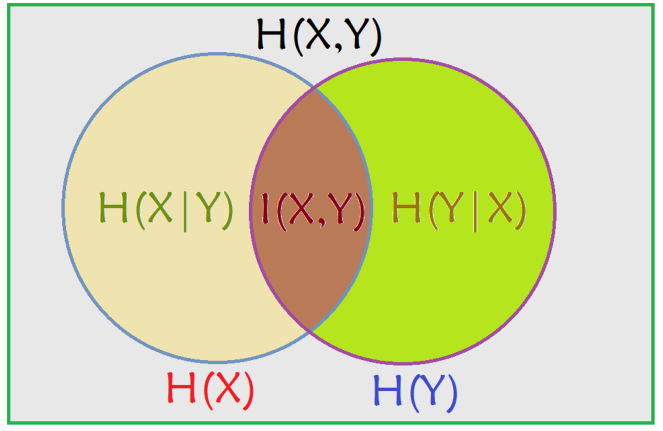

由于 H(X|X) = 0, 所以, H(X) = H(X) – H(X|X) = I(X; X)

这一方面说明了为什么熵又称自信息,另一方面说明了两个完全相互依赖的变量之间的互信息并不是一个常量,而是取决于它们的熵。

从图中可以看出，条件熵可以通过联合熵 - 熵（ H(X|Y) = H(X, Y) - H(Y) ）表示，也可以通过熵 - 互信息（ H(X|Y) = H(X) - I(X; Y) ）表示。

## 使用第二步生成的特征矩阵，利用互信息进行特征筛选。

In [103]:
from numpy.ma import array
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics as mr
from minepy import MINE
import numpy as np

X, y = load_iris(return_X_y=True)



In [104]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [111]:
# 自定义SelectKBest函数
def scores(X, y):
    mine = MINE()
    mic_scores = []
    for i in range(X.shape[1]):
      mine.compute_score(X[:, i], y)
      m = mine.mic()
      mic_scores.append(m)

    return np.array(mic_scores)

#选择K个最好的特征，返回特征选择后的数据
result = SelectKBest(scores, k=2).fit_transform(X, y)


In [112]:
result

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [78]:
# 单个
from sklearn import metrics as mr
c1 = mr.mutual_info_score(data.target,data.data[:,0])
c2 = mr.mutual_info_score(data.target,data.data[:,1])
c3 = mr.mutual_info_score(data.target,data.data[:,2])
c4 = mr.mutual_info_score(data.target,data.data[:,3])
print(c1,c2,c3,c4)

0.6078468394475832 0.3581095526343195 1.002510220562348 0.9952885384500018
